In [ ]:
import pandas as pd
import numpy as np


# New Section

In [ ]:
path ="/content/drive/MyDrive/Colab Notebooks/players_fifa23.csv"

In [ ]:
players = pd.read_csv(path)

In [ ]:
players

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,https://cdn.sofifa.net/players/243/725/23_60.png,Republic of Ireland,47,56,...,50,44,50,41,38,41,40,36,40,15
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,https://cdn.sofifa.net/players/261/933/23_60.png,China PR,47,57,...,45,45,45,47,48,47,49,49,49,15
18536,267823,L. Mullan,Liam Mullan,18,170,65,https://cdn.sofifa.net/players/267/823/23_60.png,Northern Ireland,47,67,...,52,49,52,46,44,46,46,42,46,17
18537,267824,D. McCallion,Daithí McCallion,17,178,65,https://cdn.sofifa.net/players/267/824/23_60.png,Republic of Ireland,47,61,...,33,33,33,44,42,44,47,49,47,15


In [ ]:
features = ["Overall","Potential","WageEUR","ValueEUR","Age"]

In [ ]:
players = players.dropna(subset=features)

In [ ]:
data = players[features].copy()

In [ ]:
data = ((data-data.min())/(data.max()-data.min()))*9+1

In [ ]:
data.describe()

,Overall,Potential,WageEUR,ValueEUR,Age
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,4.856099,5.407447,1.176491,1.135849,3.970132
std,1.388527,1.185868,0.389211,0.360715,1.516552
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.068182,4.638298,1.020000,1.022441,2.607143
50%,4.886364,5.404255,1.060000,1.047244,3.892857
75%,5.704545,6.170213,1.160000,1.094488,5.178571
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,Overall,Potential,WageEUR,ValueEUR,Age
0,10.0,9.234043,4.9,3.551181,7.107143
1,10.0,9.234043,10.0,4.023622,6.785714
2,10.0,9.234043,9.4,4.968504,6.464286
3,10.0,9.234043,8.0,6.078740,5.821429
4,10.0,10.000000,5.6,10.000000,3.250000


In [ ]:
def randomCentroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = randomCentroids(data,5)

In [ ]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [ ]:
labels = get_labels(data,centroids)

In [ ]:
labels.value_counts()

1    7357
2    6200
3    2724
0    1286
4     972
dtype: int64

In [ ]:
def newCentroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plotCluster(data,labels,centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f"iteration {iteration}")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.scatter(x=data_2d[:,0],y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
  plt.show()



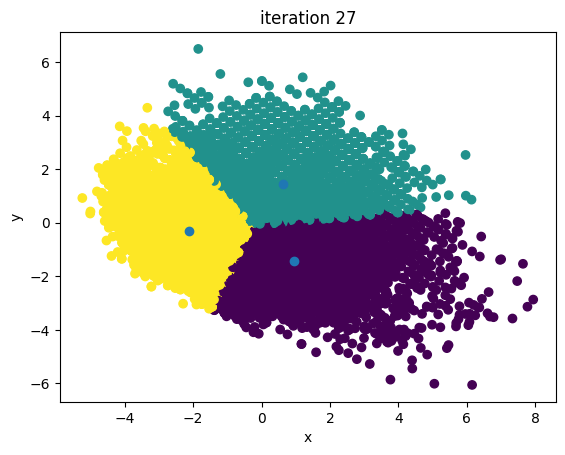

In [ ]:
max_iter =100
k = 3
centroids = randomCentroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration <max_iter and not centroids.equals(old_centroids):
      old_centroids = centroids
      labels = get_labels(data,centroids)
      centroids = newCentroids(data,labels,k)
      plotCluster(data,labels,centroids,iteration)
      iteration+=1


In [ ]:
players[labels==4][["Name"]+features].head(20)

,Name,Overall,Potential,WageEUR,ValueEUR,Age
0,L. Messi,91,91,195000,54000000,35
1,K. Benzema,91,91,450000,64000000,34
2,R. Lewandowski,91,91,420000,84000000,33
3,K. De Bruyne,91,91,350000,107500000,31
4,K. Mbappé,91,95,230000,190500000,23
5,M. Salah,90,90,270000,115500000,30
6,T. Courtois,90,91,250000,90000000,30
7,M. Neuer,90,90,72000,13500000,36
8,Cristiano Ronaldo,90,90,220000,41000000,37
9,V. van Dijk,90,90,230000,98000000,30


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
Overall,4.974515,3.735802,6.467830
Potential,4.631357,5.263921,6.721867
WageEUR,1.092325,1.039734,1.511329
ValueEUR,1.040576,1.036899,1.426251
Age,5.429109,2.667351,3.994332


In [ ]:
centroids

array([[4.97451516, 4.63135708, 1.09232453, 1.04057568, 5.42910898],
       [3.73580239, 5.26392149, 1.03973421, 1.03689877, 2.66735081],
       [6.46782991, 6.72186685, 1.5113286 , 1.42625146, 3.9943318 ]])